In [3]:
#Imports

import pandas as pd  #library to manipulate pandas
import numpy as np #library to do numerical manipulations
import matplotlib.pyplot as plt #ploting library
#import sklearn.linear_model as skl_lm 

In [ ]:
#Load traning data

training_data_path = 'MiniLab Data/training_data.csv'

#traning_data = pd.read_csv(training_data_path, na_values='?', 
#dtype={'ID': str}).dropna().reset_index()
traning_data = pd.read_csv(training_data_path)

#Randomize
np.random.seed(1)
trainI = np.random.choice(traning_data.shape[0],size=traning_data.shape[0],  \
                          replace=False)
trainIndex = traning_data.index.isin(trainI)
traning_data = traning_data.iloc[trainIndex]

traning_data.head()


In [ ]:
traning_data.describe()

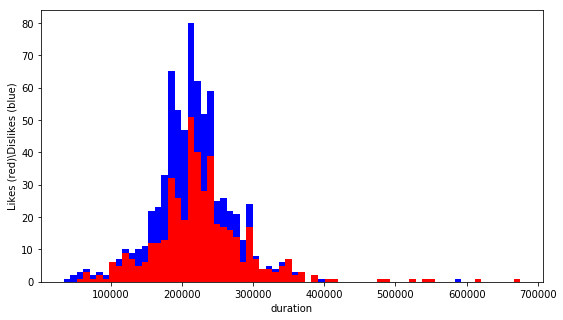

In [6]:
#we see that track duration are disterbuted widely between 33.8-675.4sec=0.56-11.25min

#considering the below references:
#https://qz.com/quartzy/1438412/the-reason-why-your-favorite-pop-songs-are-getting-shorter/
#https://www.reddit.com/r/dataisbeautiful/comments/aio8mz/distribution_of_track_length_in_top_100_songs_of/
#http://theinformationdiet.blogspot.com/2011/11/probability-distribution-of-song-length.html
#https://medium.com/cuepoint/visualizing-hundreds-of-my-favorite-songs-on-spotify-fe50c94b8af3

#from those references, we see thatvery long and very short trucks are most probably are not songs, 
#and adeed as noice data


#we first define a function that can plot histogram of likes (red) and dislikes 
#(blue) relative to some predictor
#data: is the data to plot
#predictor: the input relative to which we plot
def LikesHist(data,predictor):
    n_bins = 70
    likes=data.where(data['label']==1).dropna()
    dislikes=data.where(data['label']==0).dropna()
    plt.figure(figsize=(9, 5))
    plt.hist([likes[predictor],dislikes[predictor]],bins=n_bins,stacked=True,  \
             color=['red','blue'])
    plt.xlabel(predictor)
    plt.ylabel("Likes (red)\Dislikes (blue)")
    plt.show()
    return (likes,dislikes)

#lets see 'duration' histogram
l,d=LikesHist(traning_data,'duration')

removed entries count =  14


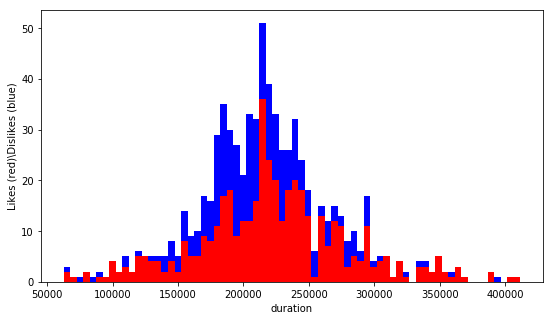

In [7]:
#from this and above references, I sugest to drop any training points
# with duration below 1 and above 7 minutes.
traning_data_cleaned_duration=traning_data.where \
((traning_data['duration']>=1*60*1000) & (traning_data['duration']<=7*60*1000)). \
dropna()

#lets see how many outliners we had
print ("removed entries count = ",traning_data.shape[0]- \
       traning_data_cleaned_duration.shape[0])

#redefine previous plot function with cleaned data
def LikesHistCleaned(predictor):
    return LikesHist(traning_data_cleaned_duration,predictor)

#plot new data
l,d=LikesHistCleaned('duration')

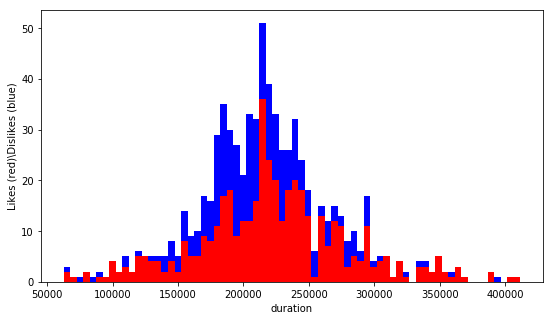

Likes count= 444
Dislikes count= 292


In [8]:
#We hypothize that there is no really relation between
# truck length and if it is been liked or not
    
likes,dislikes=LikesHistCleaned('duration')


#print total likes/dislikes
print('Likes count=',likes.shape[0])
print('Dislikes count=',dislikes.shape[0])

C:\Users\TMSxVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


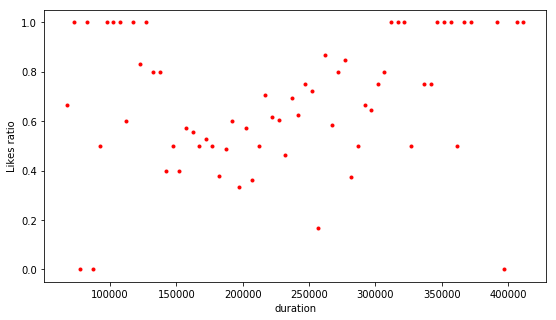

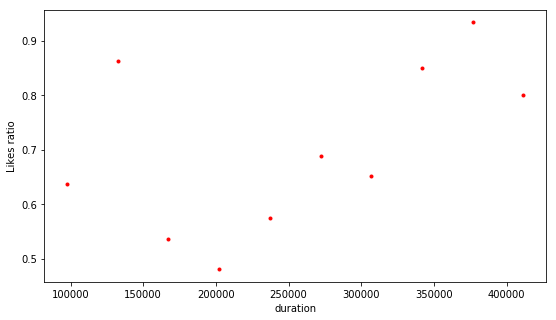

In [40]:
#it is not clear if there is a realtio or not...
#so lets plot likes % relative to duration


#We define a function that can plot likes % per some predictor
#data is the data to plot
#predictor is the input to plot likes ratio against
#bins_count how many bins to use for calculations
def LikesRatio(data, predictor, bins_count):
    #for this we create bins first
    #below range is needed to avoid a bug in python, 
    #see https://github.com/numpy/numpy/issues/10601
    rng=(data[predictor].min(), data[predictor].max())

    #get likes/dislikes for above defined bins
    hist_total, bin_edges_total=np.histogram(data[predictor], \
                                             bins=bins_count,range=rng)
    likes=data.where(data['label']==1).dropna()
    hist_likes, bin_edges_likes=np.histogram(likes[predictor], \
                                             bins=bins_count,range=rng)
    hist_likes_propotion=hist_likes/hist_total

    #we delete below one element from bin_edges_total since there 
    #are more bin eadges (+1) than data points
    plt.figure(figsize=(9, 5))
    plt.plot(np.delete(bin_edges_total,(0,0)),hist_likes_propotion,'r.')
    plt.xlabel(predictor)
    plt.ylabel('Likes ratio')
    plt.show()

#we plot likes per duration for two different bin sizes 
#(small one gives us the big picture)
LikesRatio(traning_data_cleaned_duration,'duration',70)
LikesRatio(traning_data_cleaned_duration,'duration',10)

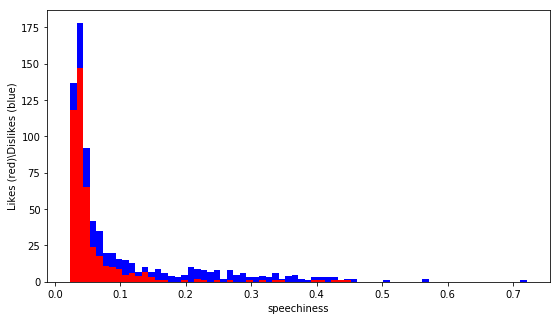

C:\Users\TMSxVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


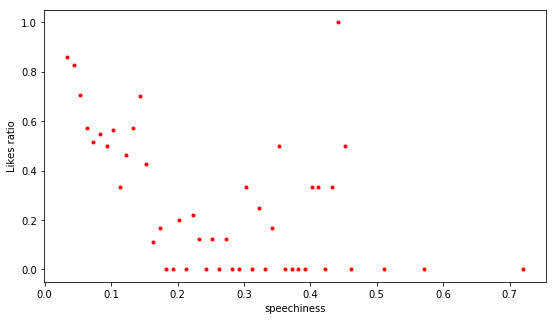

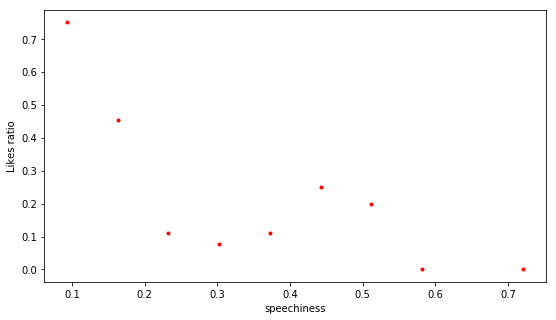

In [41]:
#we see that the result is not totally chaotic, and it seems that he tend to like 
#either very short, or very long songs, while his taste for midle length songs 
#is mixed Conclusion: removing duration is a bad idea

#according to the instructions, less than 0.33 are mostly just music, so we can 
#conclude that he highly preferes purely music trucks than songs with speach, 
#so arguably, we can remove anything higher than say 0.66 from our data set

#to check the above statment, we may also plot likes & dislikes vs speechiness
likes,dislikes=LikesHistCleaned('speechiness')

LikesRatio(traning_data_cleaned_duration,'speechiness',70)
LikesRatio(traning_data_cleaned_duration,'speechiness',10)

removed entries count =  1


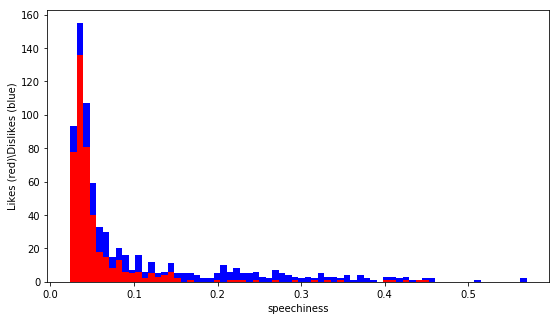

In [11]:
#where we see that dislikes do overcomes the likes once speechiness becomes over 0.06

#thus, we gonna remove all entries with speechiness higher than 0.66 from train
# AND test data, since it will reduce accurance, 
#and those are not really a music to evaluate according to it

traning_data_cleaned_duration_speechiness=traning_data_cleaned_duration.where \
(traning_data_cleaned_duration['speechiness']<0.66).dropna()

print ("removed entries count = ",traning_data_cleaned_duration.shape[0]- \
       traning_data_cleaned_duration_speechiness.shape[0])


#redefine previous plot function with cleaned data
def LikesHistCleaned2(predictor):
    return LikesHist(traning_data_cleaned_duration_speechiness,predictor)

#check results
likes,dislikes=LikesHistCleaned2('speechiness')

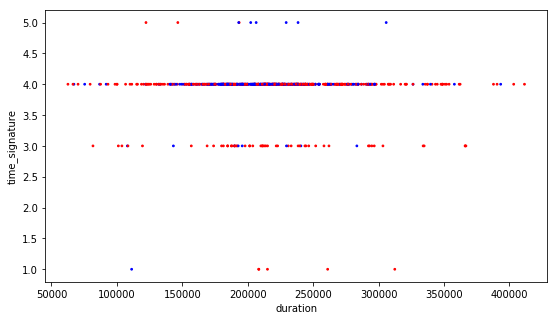

C:\Users\TMSxVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


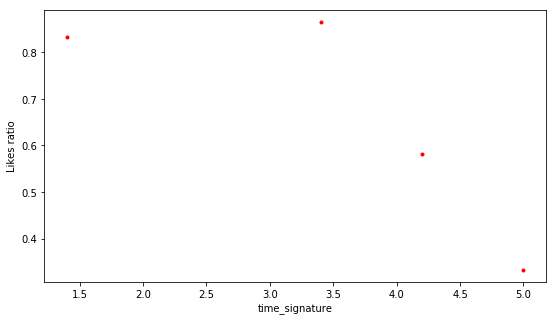

In [43]:
#now, lets see if there is any relation between duration and time_signature

#we define a function that will do a scater plot of two predictors and
#cloro liked tracks with red, and disliked with blue
#data: data to plot
#x_name,y_name: first and second predicotr
#x_trans, y_trans: apply some transformation function on both predictors
def PlotTwoPredicotrs(data,x_name,y_name,x_trans, y_trans): 
    colors=np.where(data['label']==0,'blue','red')
    plt.figure(figsize=(9, 5))
    plt.scatter(x_trans(data[x_name]),
             y_trans(data[y_name]),c=colors,s=3)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()
    
    
#same above but for cleaned data
def PlotTwoPredicotrsCleaned(x_name,y_name): 
    PlotTwoPredicotrs(traning_data_cleaned_duration_speechiness, \
                      x_name,y_name, lambda x: x, lambda x: x)
    
PlotTwoPredicotrsCleaned('duration','time_signature')

LikesRatio(traning_data_cleaned_duration_speechiness,'time_signature',10)

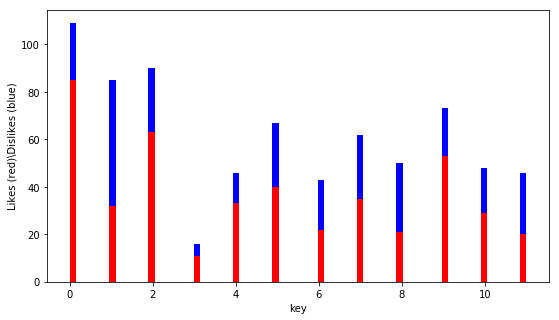

In [14]:
# we see from the plot that most songs has 4 signiture (as also in refrences), 
#we also see that Andreas dilikes songs of a big time signiture, 
#so we can't drop this predicotr

#lets do a similar thing with key predictor
likes,dislikes=LikesHistCleaned2('key')

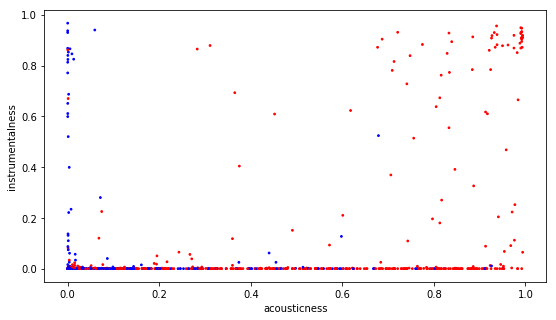

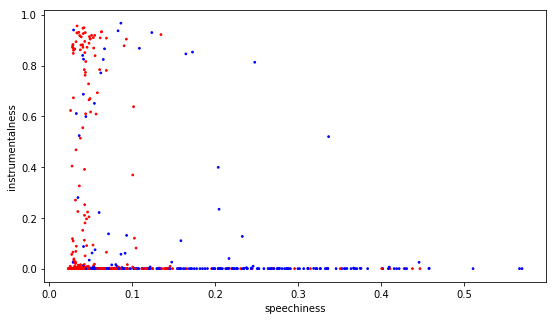

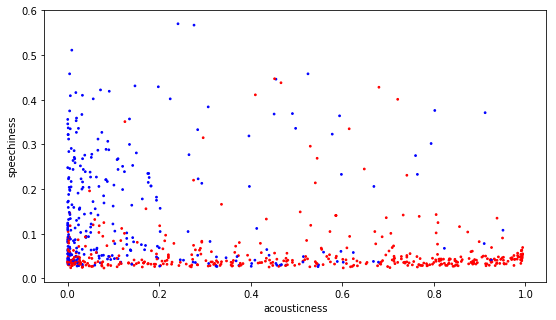

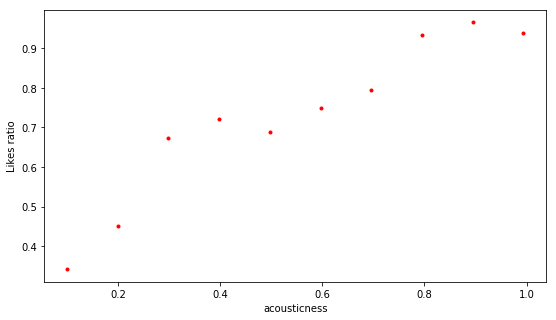

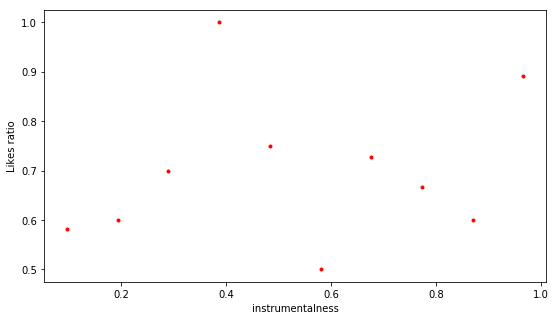

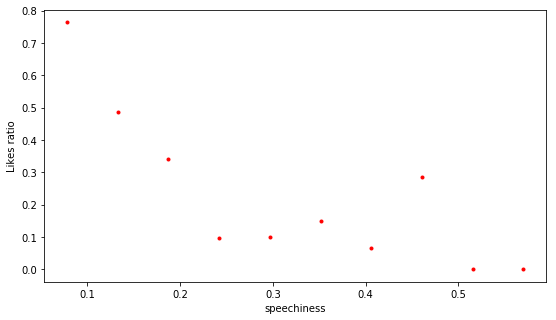

In [39]:
#Lets chack if there is a corelation between instrumentalness, 
#speechiness and acousticness since from their discription, 
#it seems as if there is some connection between them
    
PlotTwoPredicotrsCleaned ('acousticness','instrumentalness')

PlotTwoPredicotrsCleaned ('speechiness','instrumentalness')

PlotTwoPredicotrsCleaned ('acousticness','speechiness')


LikesRatio(traning_data_cleaned_duration_speechiness,'acousticness',10)
LikesRatio(traning_data_cleaned_duration_speechiness,'instrumentalness',10)
LikesRatio(traning_data_cleaned_duration_speechiness,'speechiness',10)


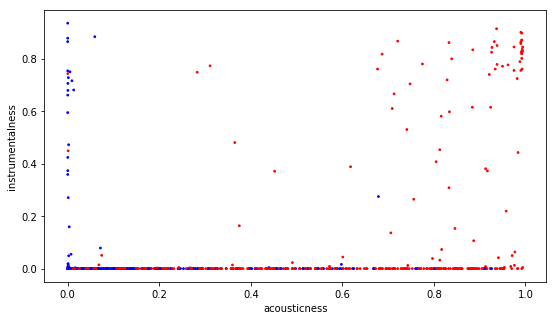

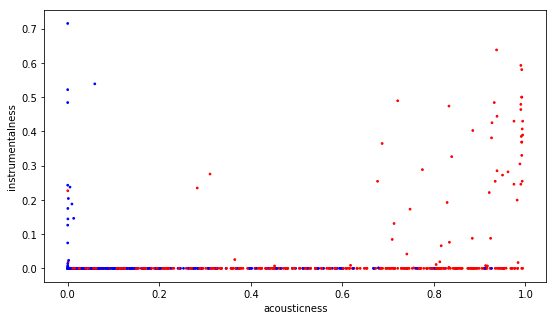

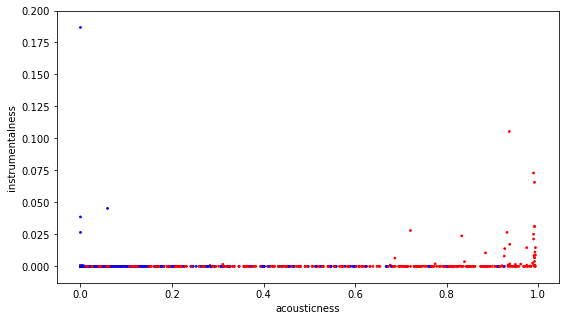

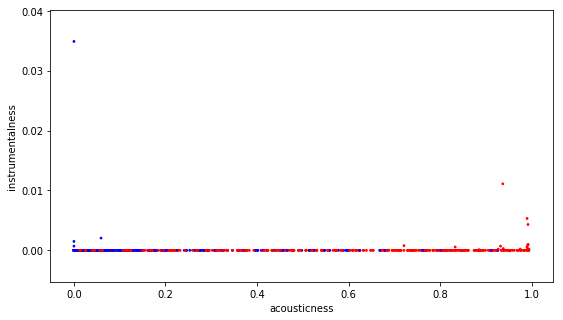

In [16]:
#we see that as if there is a corelation between those variables, 
#but still it is dose not seems
#to be very powerfull, since there is a lot of deviation from linear corelation

#we also note that there in first graph for eaxmple, 
#since instrumentalness is less than 1, we can 
#basically "compress" vertically the graph by raising 
#instrumentalness variable to some power, and by
# this the relation will be more line-like:

def RiaseToPower(Power):
    PlotTwoPredicotrs(traning_data_cleaned_duration_speechiness,
                      'acousticness',
                      'instrumentalness',
                     lambda x:x,
                     lambda x: x**Power)
  
RiaseToPower(2)
RiaseToPower(10)
RiaseToPower(50)
RiaseToPower(100)


C:\Users\TMSxVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


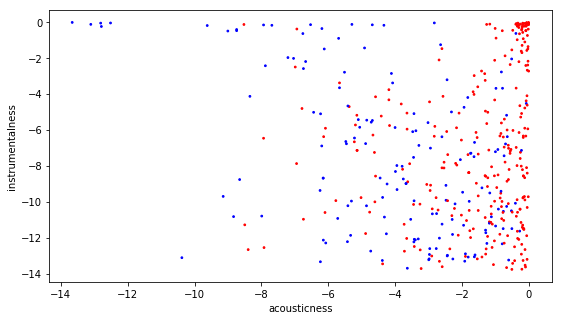

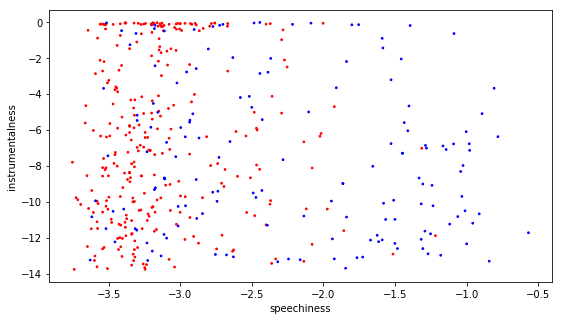

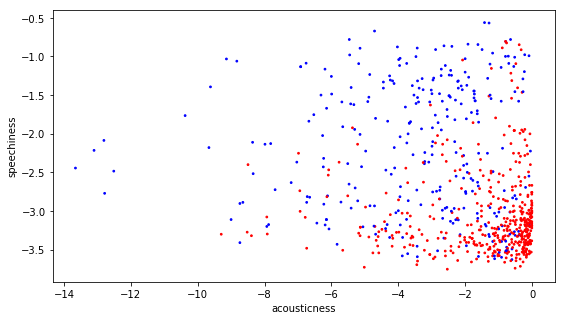

In [17]:
# we see that we need to use rediculesly high power to compress the graph
#so most probably this is not the right thing to do

#Then I thought that maybe we need to do the opossite, de-corellate those variables
#in a sence, that since we see that they kinda #tend to gether on line in all previous
#graphs, this leads to that the effect of this variables is very big for some music
#trucks, but very low for others, what eventiually will decrease any model accurancy

#to decompress those graphs, we can instade use the log of those predictors

def LogPredictorsPlot(x_name,y_name):  
     PlotTwoPredicotrs(traning_data_cleaned_duration_speechiness,
                      x_name,
                      y_name,
                     lambda x:np.log(x),
                     lambda x:np.log(x))
    
LogPredictorsPlot ('acousticness','instrumentalness')

LogPredictorsPlot ('speechiness','instrumentalness')

LogPredictorsPlot ('acousticness','speechiness')

#to remove inf values due to log(0) by replacing in speechiness them 
#by -20 since min(speechiness)=-14

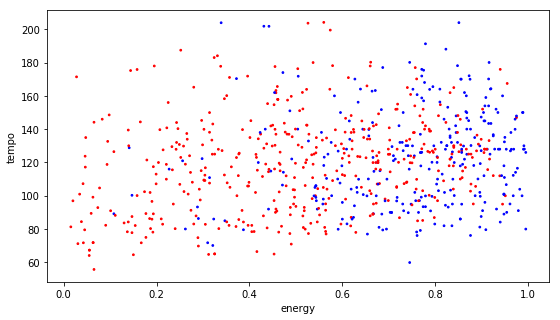

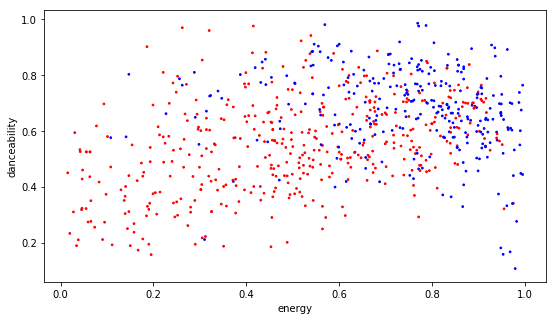

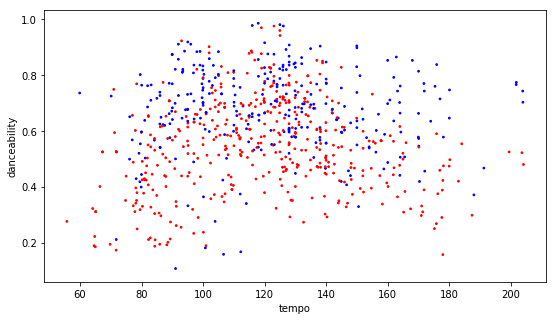

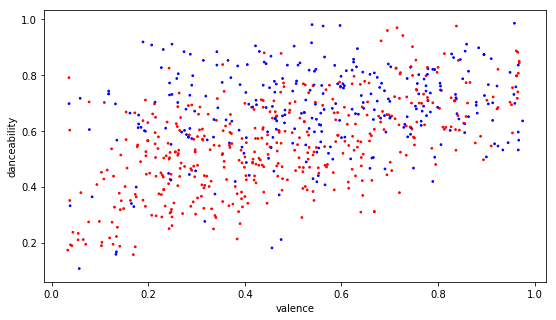

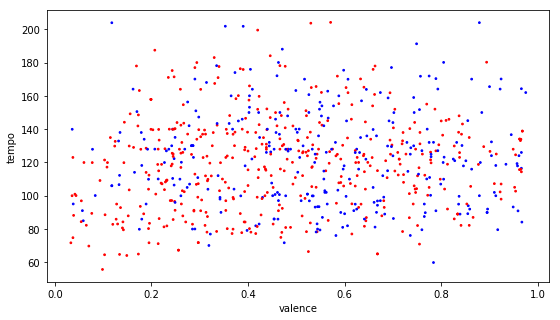

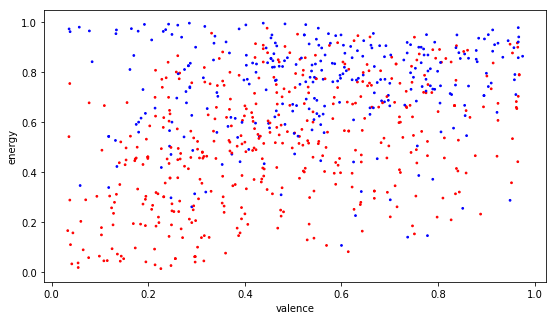

In [18]:
#so we see that now the relation between those parameters is clearly non-corelation
#and those predictors are disterbuted more widely, numerically speaking, so they will 
#have higher "weight" in our models


#now we need to analyze, if there is a relation between Energy, 
#Tempo, valance, and Dancebility predicotrs

PlotTwoPredicotrsCleaned('energy','tempo')
PlotTwoPredicotrsCleaned('energy','danceability')
PlotTwoPredicotrsCleaned('tempo','danceability')
PlotTwoPredicotrsCleaned('valence','danceability')
PlotTwoPredicotrsCleaned('valence','tempo')
PlotTwoPredicotrsCleaned('valence','energy')

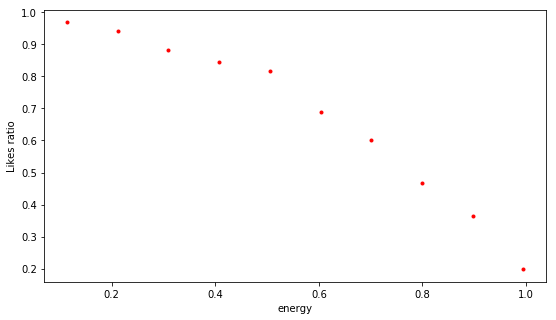

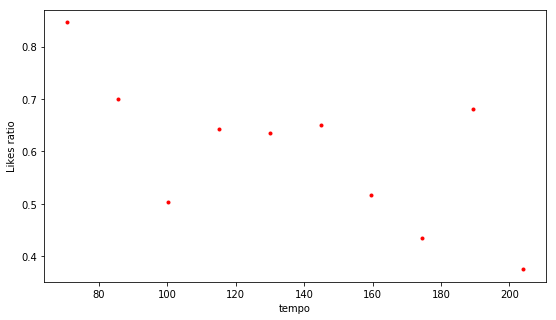

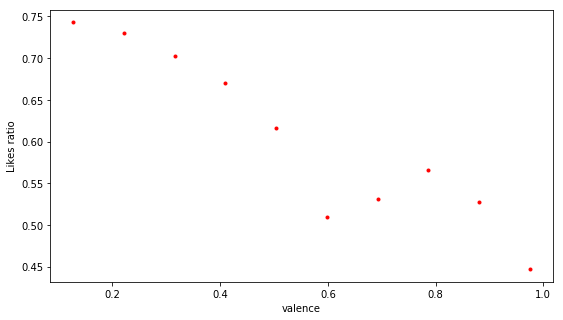

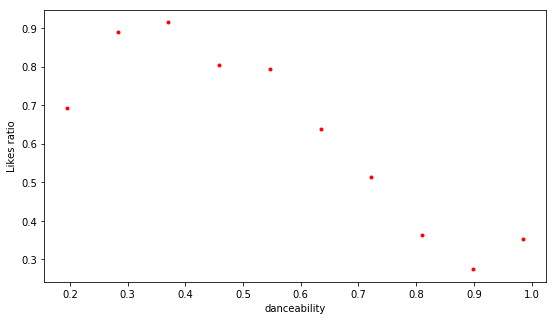

In [36]:
# we see that there is no corelation between those variavles at all, 
#so we ok to go and keep all of them
#also we see, that music of high energy, tempo , and dancebility (in the same time), 
#are not his preferance

#however, it is actually to see very interesting patterns in 
#this if one plots like ration
#for those predicotrs, but with a small number of bins count:

LikesRatio(traning_data_cleaned_duration_speechiness,'energy',10)
LikesRatio(traning_data_cleaned_duration_speechiness,'tempo',10)
LikesRatio(traning_data_cleaned_duration_speechiness,'valence',10)
LikesRatio(traning_data_cleaned_duration_speechiness,'danceability',10)

In [46]:
#and we see clearly the Andres dislikes traks of high dancebility, valance or energy
#this just tells us that there are some hidden patterns in his test, 
#and they are not fully
#chaotic as one may think for first glance.

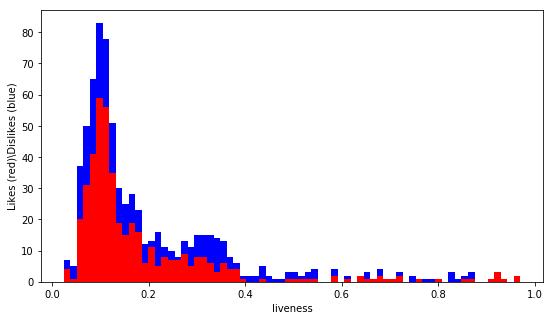

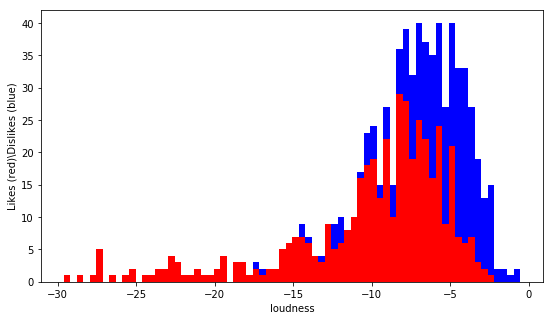

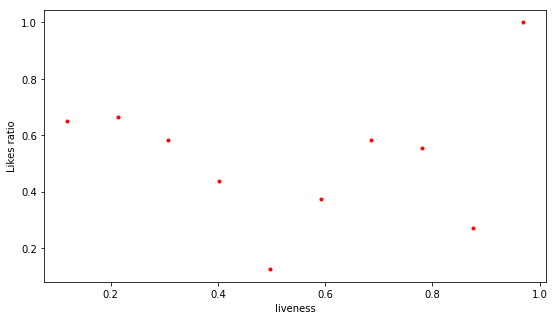

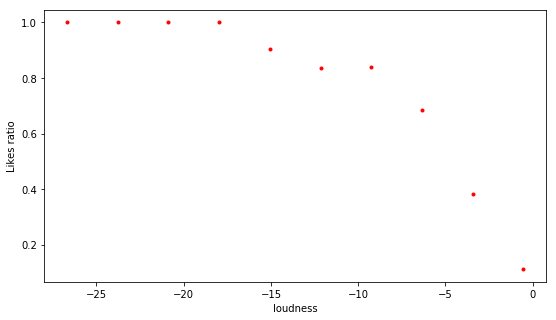

In [38]:
# we see that there is no corelation between those variavles at all, so we ok to go 
#and keep all of them also we see, that music of high energy,
# tempo , and dancebility (in the same time), 
#are not his preferance

#lets also check liveness, loudness

likes,dislikes=LikesHistCleaned2('liveness')
likes,dislikes=LikesHistCleaned2('loudness')

LikesRatio(traning_data_cleaned_duration_speechiness,'liveness',10)
LikesRatio(traning_data_cleaned_duration_speechiness,'loudness',10)

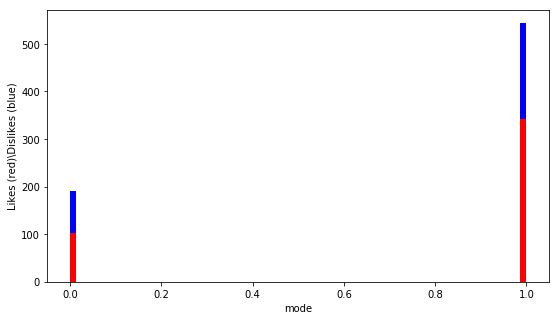

In [38]:
#we do not see here and particular corelation, however we see that he tends 
#to dislike more songs the louder they are.

#Finally, we check the last left variable mode:
likes,dislikes=LikesHistCleaned2('mode')


In [46]:
# we see that it seems that likes and dislikes proportion 
# on both modes prety similar

#lets calc it exactly:

#we first examin mode 0, and count total likes\dislike in it
Likes_Count=likes.where(likes['mode']==0).dropna().shape[0]
Dislikes_Count=dislikes.where(dislikes['mode']==0).dropna().shape[0]

print('For Mode =0')
print('likes count =',Likes_Count,'dislikes count =',Dislikes_Count)
print('Likes ratio=',Likes_Count/(Likes_Count+Dislikes_Count))

#now for mode 1
Likes_Count=likes.where(likes['mode']==1).dropna().shape[0]
Dislikes_Count=dislikes.where(dislikes['mode']==1).dropna().shape[0]

print('\nFor Mode =1')
print('likes count =',Likes_Count,'dislikes count =',Dislikes_Count)
print('Likes ratio=',Likes_Count/(Likes_Count+Dislikes_Count))


For Mode =0
likes count = 102 dislikes count = 89
Likes ratio= 0.5340314136125655

For Mode =1
likes count = 342 dislikes count = 202
Likes ratio= 0.6286764705882353


In [ ]:
# we see that the diference is only 9.35%, this can be considered due to low 
# sample size
# and that maybe we can drop Mode in our models
# we will verify if that improves accurancy.

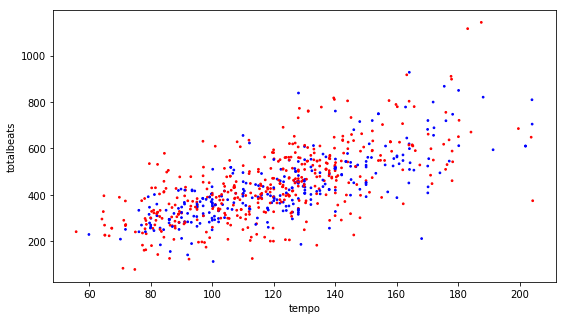

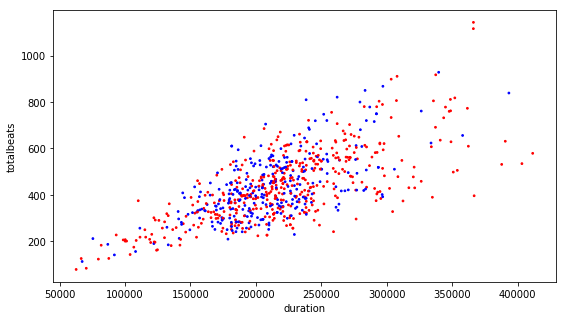

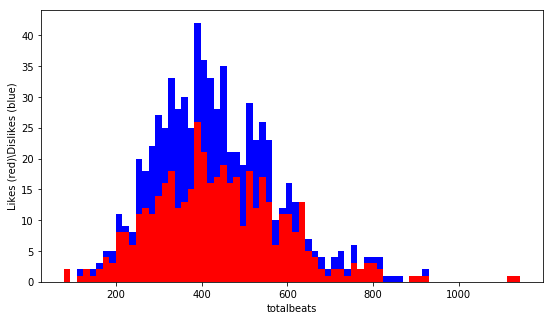

C:\Users\TMSxVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


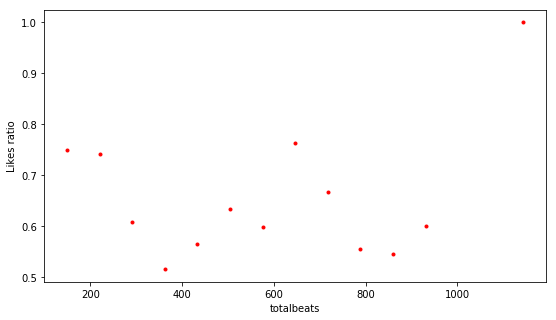

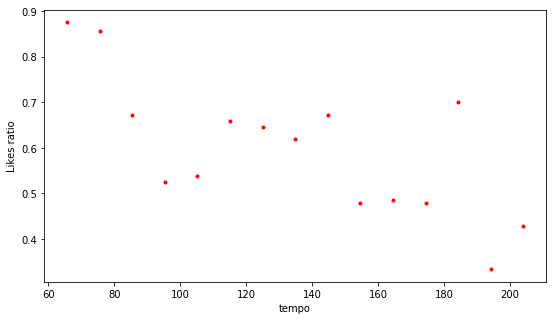

In [47]:
#from the instructions, tempo by definition are beats per second, 
#this hints us that it could be
#that total number of beats is also an relevant variable in Andreas decision, 
#so we need to examine that,
#and we add a new predictor: totalbeats

#we convert duration to minutes then multiply by tempo
total_tempo=  traning_data_cleaned_duration_speechiness['duration']/(1000*60)* \
               traning_data_cleaned_duration_speechiness['tempo']

traning_data_new=traning_data_cleaned_duration_speechiness.copy()
traning_data_new['totalbeats']=total_tempo


#redefine previous function
def PlotTwoPredicotrsNew(x_name,y_name): 
    PlotTwoPredicotrs(traning_data_new,x_name,y_name, lambda x: x, lambda x: x)
    

#lets see if we created any ad-hoc corelation
PlotTwoPredicotrsNew('tempo','totalbeats')
PlotTwoPredicotrsNew('duration','totalbeats')

#see like disterbution
l,d=LikesHist(traning_data_new,'totalbeats')

#see like ratio
LikesRatio(traning_data_new,'totalbeats',15)
LikesRatio(traning_data_new,'tempo',15)


In [ ]:
#from like ratio plot, we see that the pattern become more
#regular that what it was with tempo alone
#so it seems that adding totalbeats is a reasnoble idea.